In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


In [2]:
df = pd.read_csv("ETF_Cleaned_Minute_Data/All.csv")
df = df.dropna()
df

,Date.Time,RtnXLE,RtnXLF,RtnXLP,RtnXLB,RtnXLU,RtnXLV,RtnXLY,RtnXLK,RtnSPY,RtnXLI
0,2010-01-20T14:30:00.000000000Z,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,2010-01-20T14:31:00.000000000Z,-2.201151e-03,0.001997,0.000748,-0.002955,0.000645,0.001200,-0.000666,-8.783487e-04,0.000000,-0.001723
2,2010-01-20T14:32:00.000000000Z,1.187850e-03,0.000664,-0.000748,0.001186,-0.001612,0.000587,0.000300,0.000000e+00,0.000087,-0.001036
3,2010-01-20T14:33:00.000000000Z,-5.084746e-04,0.000664,0.000000,-0.000444,-0.001614,0.000030,0.000699,0.000000e+00,0.000176,-0.000346
4,2010-01-20T14:34:00.000000000Z,5.087333e-04,0.001991,0.000748,0.000148,-0.001617,0.000302,0.000998,4.395604e-04,0.000263,0.000346
...,...,...,...,...,...,...,...,...,...,...,...
89046,2010-12-31T20:55:00.000000000Z,-1.172505e-03,0.000314,-0.000512,-0.000260,0.000128,0.000000,0.000134,1.986492e-04,-0.000398,-0.000287
89047,2010-12-31T20:56:00.000000000Z,4.402054e-04,0.000000,0.000065,0.000260,-0.000128,0.000000,-0.000134,-3.972195e-08,0.000318,0.000287
89048,2010-12-31T20:57:00.000000000Z,-1.466999e-04,0.000628,0.000276,0.000260,0.000319,0.000000,0.000267,1.986495e-04,0.000159,0.000000
89049,2010-12-31T20:58:00.000000000Z,2.933842e-08,0.000000,0.000000,0.000260,0.000000,0.000315,0.000267,0.000000e+00,0.000159,0.000023


In [3]:
def graph_cop(x,y):
    f = plt.figure()
    graph = plt.scatter(df[x],df[y],alpha=0.5)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[x], df[y])
    kt = scipy.stats.kendalltau(df[x],df[y])[0]
    sr = scipy.stats.spearmanr(df[x],df[y])[0]
    plt.title('Minute Simple Returns')
    plt.xlabel(x[3:] + " Returns")
    plt.ylabel(y[3:] + " Returns")
    plt.show()
    return {"Beta":slope,"Alpha":intercept, "Pearson Rho":r_value, "Kendall Tau":kt, "Spearman Rho":sr}


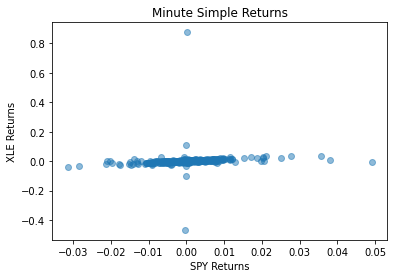

Beta :  0.9562466680058321
Alpha :  5.597418865764785e-06
Pearson Rho :  0.1829100449153858
Kendall Tau :  0.6277779704985902
Spearman Rho :  0.799548814383402


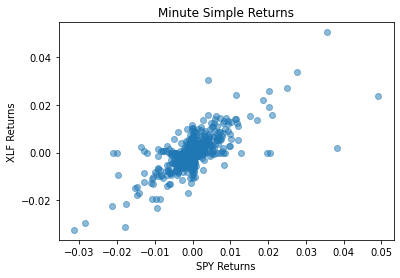

Beta :  0.9351059408141789
Alpha :  -2.631666621426802e-07
Pearson Rho :  0.7034954815107263
Kendall Tau :  0.46000803697790293
Spearman Rho :  0.6180614939791219


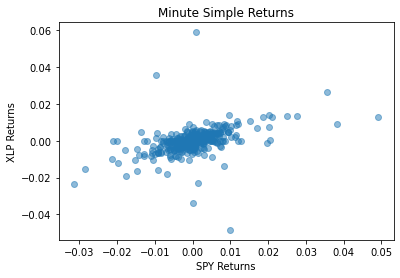

Beta :  0.4597370484122811
Alpha :  1.6413979826526657e-08
Pearson Rho :  0.5259993614528498
Kendall Tau :  0.393593773465388
Spearman Rho :  0.5313689598928114


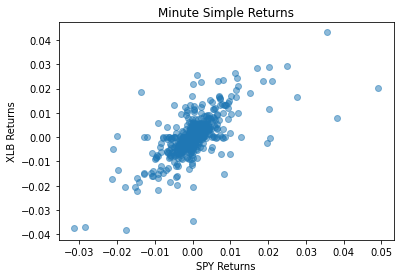

Beta :  0.9841884733459944
Alpha :  1.3465773129827202e-06
Pearson Rho :  0.7329261828076471
Kendall Tau :  0.5923049466858572
Spearman Rho :  0.7618927317563808


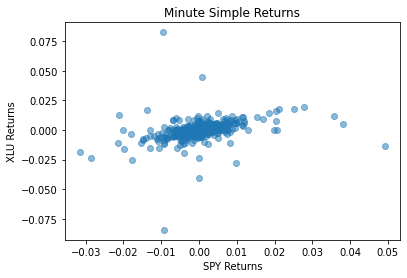

Beta :  0.5002667487853315
Alpha :  -8.746313513863176e-07
Pearson Rho :  0.44576000940270327
Kendall Tau :  0.4117026279967851
Spearman Rho :  0.5575956373579665


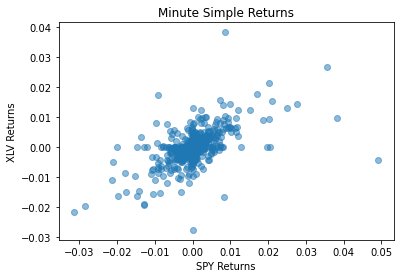

Beta :  0.5580833958683117
Alpha :  -7.466487180594472e-07
Pearson Rho :  0.6276707495909815
Kendall Tau :  0.45788873608085623
Spearman Rho :  0.6101805245830587


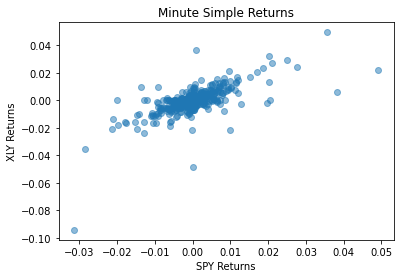

Beta :  0.9193868600657706
Alpha :  -4.948914378124233e-07
Pearson Rho :  0.7417335549344694
Kendall Tau :  0.5966721554255712
Spearman Rho :  0.7630102215808121


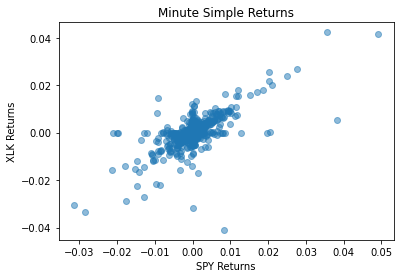

Beta :  0.8087264340474125
Alpha :  -2.2390355174292133e-07
Pearson Rho :  0.7226832331137487
Kendall Tau :  0.5041056364563054
Spearman Rho :  0.6664744822773288


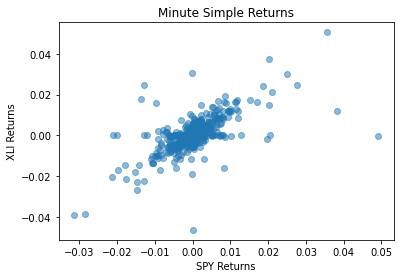

Beta :  0.8795125842289738
Alpha :  1.7229028413417203e-06
Pearson Rho :  0.7306846990259709
Kendall Tau :  0.6042766316188437
Spearman Rho :  0.7722251462931615


In [4]:
for val in ['RtnXLE','RtnXLF','RtnXLP','RtnXLB','RtnXLU','RtnXLV','RtnXLY', 'RtnXLK', 'RtnXLI']:
    params = graph_cop("RtnSPY",val)
    for k in params.keys():
        print(k, ": ", params[k])
        

In [5]:
# Kendalls Tau - rank correlation: 
    #1 represents all pairs are concordant
    #0 represents equal number of concordant and discordant pairs
    #-1 represents all pairs are discordant
    
# Spearmans Rho - correlation of ranks of points:
    #1 represents ranks of x = ranks of y
    #0 represents no correlation between ranks of x and ranks of y
    #-1 represents ranks of x are oppostie to ranks of y